In [1]:
import numpy as np # 
import pandas as pd # 


import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from datetime import datetime
from datetime import date

In [2]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'banking recommendation model-Classification of credit card(Recommendation)-Copy2.ipynb', 'banking recommendation model-Classification of credit card(Recommendation).ipynb', 'banking recommendation model-Classification+XGB+other recommendations.ipynb', 'banking recommendation model-Segmentation.ipynb', 'Banking use case', 'banking_top5.ipynb', 'bank_rec_day1.ipynb', 'bank_rec_day2.ipynb', 'bank_rec_day3-Copy2.ipynb', 'bank_rec_day3.ipynb', 'bank_rec_EDA_Graph_final.ipynb', 'completedacct.csv', 'completedcard.csv', 'completedclient.csv', 'completeddisposition.csv', 'completeddistrict.csv', 'completedloan.csv', 'completedorder.csv', 'completedtrans.csv', 'CRM Call Center Logs.csv', 'CRM Events.csv', 'CRM Events.xlsx', 'CRM Reviews.csv', 'CRM Reviews.xlsx', 'lgbm_importances-01.png', 'lime.html', 'LuxuryLoanPortfolio.csv']


#### Importing all 12 files for data view and relations

In [3]:
accounts_df = pd.read_csv ('completedacct.csv', sep = ',')
cards_df = pd.read_csv ('completedcard.csv', sep = ',')
clients_df = pd.read_csv ('completedclient.csv', sep = ',')
dispos_df = pd.read_csv ('completeddisposition.csv', sep = ',')
district_df = pd.read_csv ('completeddistrict.csv', sep = ',')
loan_df = pd.read_csv ('completedloan.csv', sep = ',')
order_df = pd.read_csv ('completedorder.csv', sep = ',')
trans_df = pd.read_csv ('completedtrans.csv', sep = ',')
crm_call_log_df = pd.read_csv ('CRM Call Center Logs.csv', sep = ',')
crm_event_df = pd.read_excel('CRM Events.xlsx')
crm_review_df = pd.read_excel('CRM Reviews.xlsx')
luxury_loan_df = pd.read_csv ('LuxuryLoanPortfolio.csv', sep = ',')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#name of all the files in list

files = [accounts_df, cards_df, clients_df, dispos_df, district_df, loan_df, order_df, trans_df,crm_call_log_df,crm_event_df,
         crm_review_df,luxury_loan_df]
files_name = ['accounts_df', 'cards_df', 'clients_df', 'dispos_df', 'district_df', 'loan_df', 'order_df', 'trans_df',
              'trans_df','crm_call_log_df','crm_event_df','crm_review_df','luxury_loan_df']

In [5]:
#verifying numeric statistics and missing values in the datasets  
for id, item in enumerate (files): 
    print ('Dataframe name: ' + str (files_name [id]) + " with number of rows:" + str (item.shape [0]) + ' and columns:' + str (item.shape [1]) )
    display (item.describe ())
    print (item.isnull ().sum ())
    print ('\n')

Dataframe name: accounts_df with number of rows:4500 and columns:7


,district_id,year,month,day
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,37.310444,2015.098222,6.573556,15.030889
std,25.177217,1.483898,3.416507,8.443985
min,1.000000,2013.000000,1.000000,1.000000
25%,13.000000,2013.000000,4.000000,8.000000
50%,38.000000,2016.000000,7.000000,15.000000
75%,60.000000,2016.000000,9.000000,22.000000
max,77.000000,2017.000000,12.000000,30.000000


account_id     0
district_id    0
frequency      0
parseddate     0
year           0
month          0
day            0
dtype: int64


Dataframe name: cards_df with number of rows:892 and columns:7


,year,month,day
count,892.000000,892.000000,892.000000
mean,2017.156951,7.242152,15.954036
std,1.059417,3.394009,8.760379
min,2013.000000,1.000000,1.000000
25%,2017.000000,5.000000,8.000000
50%,2018.000000,8.000000,16.000000
75%,2018.000000,10.000000,24.000000
max,2018.000000,12.000000,31.000000


card_id     0
disp_id     0
type        0
year        0
month       0
day         0
fulldate    0
dtype: int64


Dataframe name: clients_df with number of rows:5369 and columns:19


,day,month,year,age,zipcode,district_id
count,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,15.957161,6.521885,1973.198361,45.892717,33506.310486,37.310114
std,8.796721,3.432381,17.282283,17.287038,17817.658476,25.043690
min,1.000000,1.000000,1931.000000,12.000000,1101.000000,1.000000
25%,8.000000,4.000000,1960.000000,31.000000,10259.000000,14.000000
50%,16.000000,7.000000,1974.000000,45.000000,42869.000000,38.000000
75%,24.000000,9.000000,1988.000000,59.000000,46536.000000,60.000000
max,31.000000,12.000000,2007.000000,88.000000,49998.000000,77.000000


client_id         0
sex               0
fulldate          0
day               0
month             0
year              0
age               0
social            0
first             0
middle            0
last              0
phone             0
email             0
address_1         0
address_2      5286
city              0
state             0
zipcode           0
district_id       0
dtype: int64


Dataframe name: dispos_df with number of rows:5369 and columns:4


,disp_id,client_id,account_id,type
count,5369,5369,5369,5369
unique,5369,5369,4500,2
top,D00000219,C00003492,A00003671,Owner
freq,1,1,2,4500


disp_id       0
client_id     0
account_id    0
type          0
dtype: int64


Dataframe name: district_df with number of rows:77 and columns:6


,district_id
count,77.000000
mean,39.000000
std,22.371857
min,1.000000
25%,20.000000
50%,39.000000
75%,58.000000
max,77.000000


district_id     0
city            0
state_name      0
state_abbrev    0
region          0
division        0
dtype: int64


Dataframe name: loan_df with number of rows:682 and columns:12


,amount,duration,payments,year,month,day,location
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,151410.175953,36.492669,4190.664223,2016.234604,6.664223,15.447214,15.068915
std,113372.406310,17.075219,2215.830344,1.466445,3.443717,9.116524,25.246385
min,4980.000000,12.000000,304.000000,2013.000000,1.000000,1.000000,1.000000
25%,66732.000000,24.000000,2477.000000,2015.000000,4.000000,8.000000,1.000000
50%,116928.000000,36.000000,3934.000000,2017.000000,7.000000,15.000000,1.000000
75%,210654.000000,48.000000,5813.500000,2017.000000,10.000000,24.000000,18.000000
max,590820.000000,60.000000,9910.000000,2018.000000,12.000000,31.000000,70.000000


loan_id       0
account_id    0
amount        0
duration      0
payments      0
status        0
year          0
month         0
day           0
fulldate      0
location      0
purpose       0
dtype: int64


Dataframe name: order_df with number of rows:6471 and columns:6


,order_id,account_to,amount
count,6471.000000,6.471000e+03,6471.000000
mean,33778.197497,4.939904e+07,3280.635698
std,3737.681949,2.888356e+07,2714.475335
min,29401.000000,3.990000e+02,1.000000
25%,31187.500000,2.415918e+07,1241.500000
50%,32988.000000,4.975606e+07,2596.000000
75%,34785.500000,7.400045e+07,4613.500000
max,46338.000000,9.999420e+07,14882.000000


order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64


Dataframe name: trans_df with number of rows:1056320 and columns:16


,Unnamed: 0,amount,balance,account,year,month,day
count,1.056320e+06,1.056320e+06,1.056320e+06,2.953890e+05,1.056320e+06,1.056320e+06,1.056320e+06
mean,5.281605e+05,5.924146e+03,3.851833e+04,4.567092e+07,2.016500e+03,6.573180e+00,1.835395e+01
std,3.049335e+05,9.522735e+03,2.211787e+04,3.066340e+07,1.397469e+00,3.583150e+00,1.019706e+01
min,1.000000e+00,0.000000e+00,-4.112570e+04,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.640808e+05,1.359000e+02,2.240250e+04,1.782858e+07,2.016000e+03,3.000000e+00,9.000000e+00
50%,5.281605e+05,2.100000e+03,3.314340e+04,4.575095e+07,2.017000e+03,7.000000e+00,1.500000e+01
75%,7.922402e+05,6.800000e+03,4.960362e+04,7.201341e+07,2.018000e+03,1.000000e+01,3.000000e+01
max,1.056320e+06,8.740000e+04,2.096370e+05,9.999420e+07,2.018000e+03,1.200000e+01,3.100000e+01


Unnamed: 0               0
trans_id                 0
account_id               0
type                     0
operation           183114
amount                   0
balance                  0
k_symbol            481881
bank                782812
account             760931
year                     0
month                    0
day                      0
fulldate                 0
fulltime                 0
fulldatewithtime         0
dtype: int64


Dataframe name: trans_df with number of rows:3999 and columns:13


,call_id,priority
count,3015.000000,3015.000000
mean,35110.222222,0.740962
std,3962.267289,0.878991
min,30075.000000,0.000000
25%,30838.500000,0.000000
50%,35213.000000,0.000000
75%,35979.500000,2.000000
max,50175.000000,2.000000


Date received       0
Complaint ID     1495
rand client      1495
phonefinal          0
vru+line          984
call_id           984
priority          984
type              984
outcome           984
server            984
ser_start           0
ser_exit            0
ser_time            0
dtype: int64


Dataframe name: crm_call_log_df with number of rows:23419 and columns:15


,Sub-issue
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


Date received                       0
Product                             0
Sub-product                      9328
Issue                               0
Sub-issue                       23419
Consumer complaint narrative    18952
Tags                            20143
Consumer consent provided?      16547
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?               1002
Complaint ID                        0
Client_ID                           0
dtype: int64


Dataframe name: crm_event_df with number of rows:505 and columns:5


,Stars,district_id
count,505.000000,505.000000
mean,4.245545,39.336634
std,1.560647,22.883971
min,1.000000,1.000000
25%,5.000000,19.000000
50%,5.000000,40.000000
75%,5.000000,60.000000
max,5.000000,77.000000


Date             0
Stars            0
Reviews        436
Product          0
district_id      0
dtype: int64


Dataframe name: crm_review_df with number of rows:1678 and columns:32


,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,loan balance,property value,employment length,ZIP CODE,TOTAL UNITS,TAX CLASS AT TIME OF SALE
count,1.678000e+03,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1.678000e+03,1.678000e+03,1678.000000,1678.000000,1678.000000,1678.000000
mean,1.848830e+06,27.362932,328.355185,2.255025,3.800451,0.038004,9630.000787,47.147795,1.412786e+06,2.012219e+06,9.318832,10098.516687,2.736591,1.870083
std,3.953120e+06,5.616759,67.401114,0.439442,0.450005,0.004500,24811.073341,28.375068,3.589084e+06,3.951243e+06,5.095769,76.606597,4.355791,0.670388
min,4.400000e+05,10.000000,120.000000,1.370000,2.648000,0.026480,1900.780000,0.000000,1.978503e+05,4.732000e+05,1.000000,10001.000000,0.000000,1.000000
25%,1.088750e+06,30.000000,360.000000,1.880000,3.446500,0.034465,5256.095000,22.000000,7.343424e+05,1.229188e+06,5.000000,10026.000000,1.000000,2.000000
50%,1.490000e+06,30.000000,360.000000,2.240000,3.787500,0.037875,7356.725000,47.000000,1.102861e+06,1.653925e+06,9.000000,10104.000000,1.000000,2.000000
75%,1.848000e+06,30.000000,360.000000,2.600000,4.145000,0.041450,9755.227500,72.000000,1.487449e+06,2.035638e+06,14.000000,10159.000000,4.000000,2.000000
max,1.560000e+08,30.000000,360.000000,3.230000,4.828000,0.048280,981383.990000,96.000000,1.432420e+08,1.560209e+08,18.000000,10282.000000,72.000000,4.000000


loan_id                              0
funded_amount                        0
funded_date                          0
duration years                       0
duration months                      0
10 yr treasury index date funded     0
interest rate percent                0
interest rate                        0
payments                             0
total past payments                  0
loan balance                         0
property value                       0
purpose                              0
firstname                            0
middlename                           0
lastname                             0
social                               0
phone                                0
title                               12
employment length                    0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BUILDING CLASS AT PRESENT            0
ADDRESS 1                            0
ADDRESS 2                            0
ZIP CODE                 

In [6]:
crm_call_log_df.head()

,Date received,Complaint ID,rand client,phonefinal,vru+line,call_id,priority,type,outcome,server,ser_start,ser_exit,ser_time
0,2017-03-27,CR2406263,C00004587,977-806-9726,AA0103,34536.0,0.0,NW,AGENT,MICHAL,13:34:11,13:40:23,00:06:12
1,2017-03-27,CR2405641,C00003328,322-598-7152,AA0205,34537.0,0.0,PS,AGENT,TOVA,10:58:22,11:16:10,00:17:48
2,2017-03-27,CR2405629,C00001685,508-311-5237,AA0110,34538.0,2.0,PS,AGENT,YIFAT,13:00:54,13:13:31,00:12:37
3,2017-03-23,CR2400594,C00001945,265-394-2727,AA0113,34540.0,2.0,PS,AGENT,AVNI,16:18:21,16:19:40,00:01:19
4,2017-03-22,CR2399607,C00004303,206-008-0460,AA0102,34541.0,1.0,PS,AGENT,STEREN,14:48:22,14:55:19,00:06:57


In [7]:
crm_event_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Client_ID
0,2014-07-03,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,NaN,Email,2014-07-09,Closed with explanation,Yes,No,CR0922485,C00001925
1,2012-04-12,Bank account or service,Savings account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-04-13,Closed with relief,Yes,No,CR0057298,C00003141
2,2012-04-03,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-04-03,Closed without relief,Yes,No,CR0043811,C00000297
3,2012-03-14,Credit card,NaN,Billing disputes,NaN,NaN,NaN,NaN,Email,2012-03-14,Closed with relief,Yes,No,CR0035411,C00004275
4,2012-03-05,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-03-06,Closed with relief,Yes,No,CR0030939,C00000900


In [8]:
crm_review_df.head()

,Date,Stars,Reviews,Product,district_id
0,2017-10-04,5,"Great job, Eagle National! Each person was pro...",Eagle National Mortgage,65
1,2017-10-02,5,Matthew Richardson is professional and helpful...,Eagle National Mortgage,66
2,2017-08-21,5,We had a past experience with Eagle National M...,Eagle National Mortgage,23
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Eagle National Mortgage,55
4,2016-05-27,5,I can't express how grateful I am for the supp...,Eagle National Mortgage,24


In [9]:
luxury_loan_df.head()

,loan_id,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,...,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,ZIP CODE,CITY,STATE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,...,R1,171 SOUTH 9TH STREET,9,10001,New York City,NY,1,0,0,2
1,LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,...,R3,1242 E 80TH ST,19,10104,New York City,NY,1,0,0,1
2,LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,...,R3,1884 53RD STREET,2,10029,New York City,NY,1,0,0,1
3,LL0000175,1079000.0,2012-02-23,20,240,1.99,3.389,0.03389,6196.40,94,...,R1,79 EAGLE STREET,6,10010,New York City,NY,1,0,0,2
4,LL0000178,2028000.0,2016-04-01,20,240,1.79,3.188,0.03188,11439.05,45,...,RW,34 NORTH 7TH STREET,5,10172,New York City,NY,1,0,0,4


In [10]:
def date_correction (df, col_name):
    """ Function that will re-format cells into date format
    """
    df [col_name] = pd.to_datetime (df [col_name], errors = 'coerce')
    return df

In [11]:
date_cor_files=[trans_df, loan_df]
for id, item in enumerate (date_cor_files): 
    date_cor_files [id] = date_correction (item, 'fulldate')

trans_df = date_cor_files [0]
loans_df = date_cor_files [1]

In [12]:
crm_call_log_df ['Date received'] = pd.to_datetime (crm_call_log_df ['Date received'], errors = 'coerce')
accounts_df ['parseddate'] = pd.to_datetime (accounts_df ['parseddate'], errors = 'coerce')

In [13]:
#verifying transactions execution dates period in trans_df  
trans1 = trans_df.sort_values (['fulldate'])
display (trans1.head (n=3))
display (trans1.tail (n=3))

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21


,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
1053314,1053315,T03631495,A00003053,Credit,NaN,349.8,86982.1,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,16:53:60,2018-12-31T16:53:60
1053320,1053321,T03632209,A00003077,Credit,NaN,267.9,68530.7,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,14:55:47,2018-12-31T14:55:47
1056319,1056320,T03626540,A00002902,Credit,NaN,164.1,41642.9,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,10:44:40,2018-12-31T10:44:40


#### From above we can see that transactions given for a period from 1st of Jan 2013 till 31st of Dec 2018

In [14]:
clients_df.head()

,client_id,sex,fulldate,day,month,year,age,social,first,middle,last,phone,email,address_1,address_2,city,state,zipcode,district_id
0,C00000001,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,emma.smith@gmail.com,387 Wellington Ave.,Unit 1,Albuquerque,NM,47246,18
1,C00000002,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,Thompson,212-423-7734,noah.thompson@gmail.com,75 W. Berkshire St.,NaN,New York City,NY,10040,1
2,C00000003,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,olivia.johnson@outlook.com,36 Second St.,NaN,New York City,NY,10162,1
3,C00000004,Male,1976-12-01,1,12,1976,43,580-20-3414,Liam,Irvin,White,951-567-8925,liam.white@gmail.com,7607 Sunnyslope Street,NaN,Indianapolis,IN,49047,5
4,C00000005,Female,1980-07-03,3,7,1980,39,536-14-5809,Sophia,Danae,Williams,428-265-1568,sophia.williams@gmail.com,755 Galvin Street,NaN,Indianapolis,IN,40852,5


#Demographic data overview
----------------------------------------------------------------------

-Gender proportion of the bank's customers.
-Age distribution of the bank's customers.
-Clients habitation in different regions of Czech Republic and average salaries of the regions.
-Districts that could be attractive for future bank's market invasion in terms of population, average salary and underrepresented clients base.

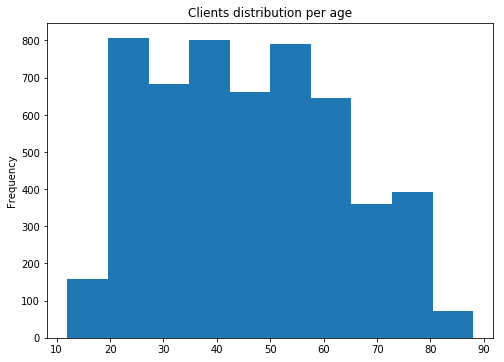

In [15]:
#plotting customers distribution by age
clients_df ['age'].plot (kind = 'hist',
                    title = 'Clients distribution per age',
                   # width = 0.75,
                    figsize = (8, 5.8)
                    )

In [16]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from collections import Counter

In [17]:
target1 = clients_df [clients_df ['sex'] == 'Male'].shape [0]
target0 = clients_df [clients_df ['sex'] == 'Female'].shape [0]

trace0 = go.Bar (
    x = ['Men', 'Women'],
    y = [target1/ (target1 + target0) *100, target0/ (target1 + target0) *100], 
    marker = dict (color=['rgba(34, 167, 240, 1)', 'rgba(222,45,38,0.8)']
                  ),
) 
data = [trace0]
layout = go.Layout (title = 'Gender proportion (%)', autosize= False, width= 500, height= 500,
                    )
fig = go.Figure (data=data, layout = layout)
#plotly.offline.iplot()
py.iplot (fig, filename = 'test')

In [18]:
print ('Percentage of men: '+ str (target1/clients_df.shape [0]*100) +'%' + ' percentage of women: ' + str (target0/clients_df.shape [0]*100) + '%')

Percentage of men: 50.73570497299311% percentage of women: 49.264295027006895%


In [19]:
district_df.head()

,district_id,city,state_name,state_abbrev,region,division
0,1,New York City,New York,NY,Northeast,Middle Atlantic
1,2,Jacksonville,Florida,FL,South,South Atlantic
2,3,Columbus,Ohio,OH,Midwest,East North Central
3,4,Charlotte,North Carolina,NC,South,South Atlantic
4,5,Indianapolis,Indiana,IN,Northeast,East North Central


### Combine dataframe clients_dist2_df from Clients_df and district_df

In [25]:
clients_dist_df = clients_df
clients_dist2_df = clients_dist_df.merge (district_df, left_on = 'district_id', right_on = 'district_id', 
                                           how = 'left', validate = 'many_to_one') 
display (clients_df.head (n=3))
display (clients_dist2_df.head (n=3))

,client_id,sex,fulldate,day,month,year,age,social,first,middle,last,phone,email,address_1,address_2,city,state,zipcode,district_id
0,C00000001,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,emma.smith@gmail.com,387 Wellington Ave.,Unit 1,Albuquerque,NM,47246,18
1,C00000002,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,Thompson,212-423-7734,noah.thompson@gmail.com,75 W. Berkshire St.,NaN,New York City,NY,10040,1
2,C00000003,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,olivia.johnson@outlook.com,36 Second St.,NaN,New York City,NY,10162,1


,client_id,sex,fulldate,day,month,year,age,social,first,middle,...,address_2,city_x,state,zipcode,district_id,city_y,state_name,state_abbrev,region,division
0,C00000001,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,...,Unit 1,Albuquerque,NM,47246,18,Albuquerque,New Mexico,NM,West,Mountain
1,C00000002,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,...,NaN,New York City,NY,10040,1,New York City,New York,NY,Northeast,Middle Atlantic
2,C00000003,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,...,NaN,New York City,NY,10162,1,New York City,New York,NY,Northeast,Middle Atlantic


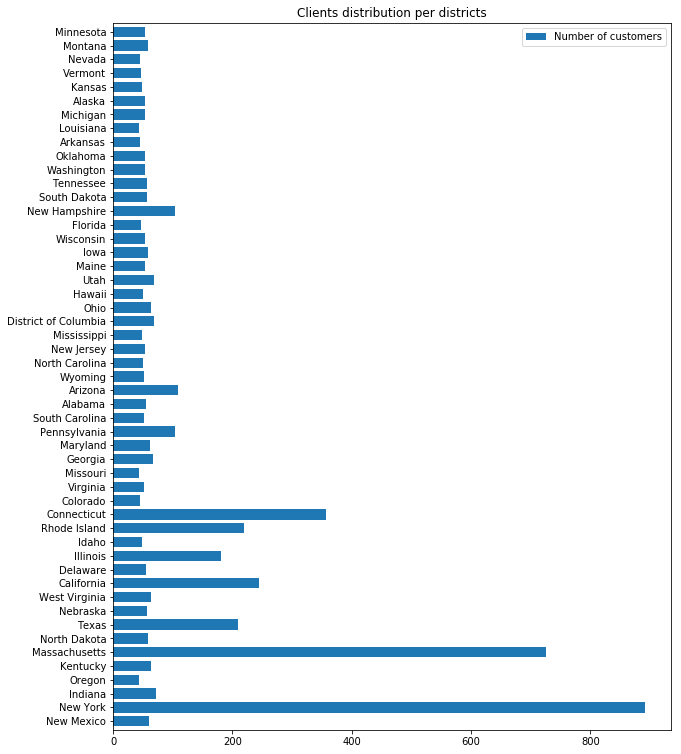

In [27]:
#Plotting clients presence in different districts
reg_count = Counter (clients_dist2_df ['state_name'])
region_counts = pd.DataFrame.from_dict (reg_count, orient = 'index')
region_counts.columns = ['Number of customers']
region_counts2 = region_counts# / (region_counts ['Percentage_ratio'].sum ()) * 100

region_counts2.plot (kind = 'barh',
                    title = 'Clients distribution per districts',
                    width = 0.75,
                    figsize = (10, 13)
                    )

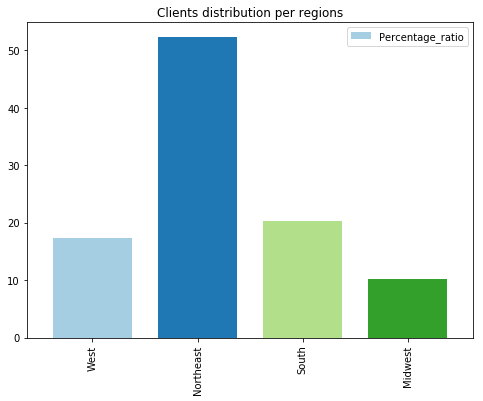

In [37]:
#Plotting clients presence in different major regions

reg_count = Counter (clients_dist2_df ['region'])
region_counts = pd.DataFrame.from_dict (reg_count, orient = 'index')
region_counts.columns = ['Percentage_ratio']
region_counts2 = region_counts / (region_counts ['Percentage_ratio'].sum ()) * 100
region_counts2.plot (kind = 'bar',
                    title = 'Clients distribution per regions',
                    width = 0.75,
                    figsize = (8, 5.8),
                    color = [plt.cm.Paired(np.arange(len(region_counts)))])

Men and women almost equally presented among the bank's customers, 50.74% for men and 49.26% for women.
Majority of clients are between age of 20 to 60. 

Card products' patterns
Overall view on the proportion of issued card products. 
Card products distribution among different regions of Czech. Is there any regions where specific card products are more popular than another? 

Counter({'VISA Signature': 659, 'VISA Standard': 145, 'VISA Infinite': 88})

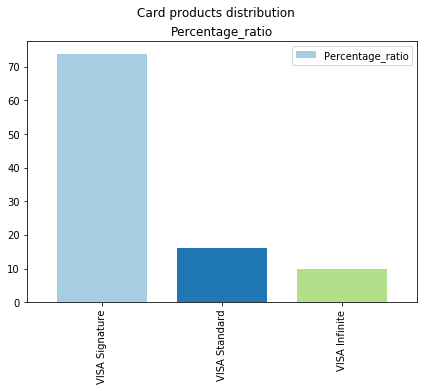

In [38]:
product_count = Counter (cards_df ['type'])
product_counts = pd.DataFrame.from_dict (product_count, orient = 'index')
product_counts.columns = ['Percentage_ratio']
product_counts = product_counts / (product_counts ['Percentage_ratio'].sum ()) * 100
product_counts.plot (kind = 'bar',
                    title = 'Card products distribution',
                    width = 0.75,
                    figsize = (7, 4.8),
                    subplots = True, 
                    color = [plt.cm.Paired(np.arange(len(region_counts)))]
                    )
display (product_count)

In [39]:
#merging cards_df and corresponding dispos_df so to find client_id and then from client_id to find corresponding region data

cards_disp_df = cards_df
cards_disp2_df = cards_disp_df.merge (dispos_df, left_on = 'disp_id', right_on = 'disp_id', 
                                           how = 'left', validate = 'many_to_one') 
display (cards_df.head (n=3))
display (cards_disp2_df.head (n=3))     
print ("Verifying shape. Before: " + str (cards_df.shape)+ " After: " + str (cards_disp2_df.shape))

,card_id,disp_id,type,year,month,day,fulldate
0,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07
1,V00000104,D00000588,VISA Signature,2014,1,19,2014-01-19
2,V00000747,D00004915,VISA Signature,2014,2,5,2014-02-05


,card_id,disp_id,type_x,year,month,day,fulldate,client_id,account_id,type_y
0,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07,C00009593,A00007753,Owner
1,V00000104,D00000588,VISA Signature,2014,1,19,2014-01-19,C00000588,A00000489,Owner
2,V00000747,D00004915,VISA Signature,2014,2,5,2014-02-05,C00004915,A00004078,Owner


Verifying shape. Before: (892, 7) After: (892, 10)


#full date is issue date

In [40]:
#merging cards_disp2_df with clients_dist2_df. as a result I will have a df with card products and corresponding regions info
#in the same DF

cards_disp3_df = cards_disp2_df
cards_disp_reg_df = cards_disp3_df.merge (clients_dist2_df, left_on = 'client_id', right_on = 'client_id', 
                                           how = 'left', validate = 'many_to_one') 
display (cards_disp2_df.head (n=3))
display (cards_disp_reg_df.head (n=3))     
print ("Verifying shape. Before: " + str (cards_disp2_df.shape)+ " After: " + str (cards_disp_reg_df.shape))

,card_id,disp_id,type_x,year,month,day,fulldate,client_id,account_id,type_y
0,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07,C00009593,A00007753,Owner
1,V00000104,D00000588,VISA Signature,2014,1,19,2014-01-19,C00000588,A00000489,Owner
2,V00000747,D00004915,VISA Signature,2014,2,5,2014-02-05,C00004915,A00004078,Owner


,card_id,disp_id,type_x,year_x,month_x,day_x,fulldate_x,client_id,account_id,type_y,...,address_2,city_x,state,zipcode,district_id,city_y,state_name,state_abbrev,region,division
0,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07,C00009593,A00007753,Owner,...,NaN,Chicago,IL,49158,74,Chicago,Illinois,IL,Northeast,East North Central
1,V00000104,D00000588,VISA Signature,2014,1,19,2014-01-19,C00000588,A00000489,Owner,...,NaN,Fall River,MA,2723,61,Fall River,Massachusetts,MA,Northeast,New England
2,V00000747,D00004915,VISA Signature,2014,2,5,2014-02-05,C00004915,A00004078,Owner,...,NaN,Fargo,ND,41797,40,Fargo,North Dakota,ND,Midwest,West North Central


Verifying shape. Before: (892, 10) After: (892, 33)


In [41]:
#preparing dataset for plotting of number of products per regions

#grouping by region ("region") and card product ('type_x'), then counting number of cards 
region_product_df = pd.DataFrame (cards_disp_reg_df.groupby (['region', 'type_x'], axis = 0) ['type_x'].count ())
region_product_df.columns = ['count']

#making columns out of multi-index of A3 and type_x so to make it easier to operate with values
region_product_df.reset_index (level= ['type_x', 'region'], inplace = True)
display (region_product_df .head (n=5))

,region,type_x,count
0,Midwest,VISA Infinite,6
1,Midwest,VISA Signature,59
2,Midwest,VISA Standard,10
3,Northeast,VISA Infinite,46
4,Northeast,VISA Signature,341


In [ ]:
crm_call_log_df
crm_event_df 
crm_review_df 
luxury_loan_df 

In [29]:
crm_call_log_df.head()

,Date received,Complaint ID,rand client,phonefinal,vru+line,call_id,priority,type,outcome,server,ser_start,ser_exit,ser_time
0,2017-03-27,CR2406263,C00004587,977-806-9726,AA0103,34536.0,0.0,NW,AGENT,MICHAL,13:34:11,13:40:23,00:06:12
1,2017-03-27,CR2405641,C00003328,322-598-7152,AA0205,34537.0,0.0,PS,AGENT,TOVA,10:58:22,11:16:10,00:17:48
2,2017-03-27,CR2405629,C00001685,508-311-5237,AA0110,34538.0,2.0,PS,AGENT,YIFAT,13:00:54,13:13:31,00:12:37
3,2017-03-23,CR2400594,C00001945,265-394-2727,AA0113,34540.0,2.0,PS,AGENT,AVNI,16:18:21,16:19:40,00:01:19
4,2017-03-22,CR2399607,C00004303,206-008-0460,AA0102,34541.0,1.0,PS,AGENT,STEREN,14:48:22,14:55:19,00:06:57


In [30]:
crm_event_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Client_ID
0,2014-07-03,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,NaN,Email,2014-07-09,Closed with explanation,Yes,No,CR0922485,C00001925
1,2012-04-12,Bank account or service,Savings account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-04-13,Closed with relief,Yes,No,CR0057298,C00003141
2,2012-04-03,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-04-03,Closed without relief,Yes,No,CR0043811,C00000297
3,2012-03-14,Credit card,NaN,Billing disputes,NaN,NaN,NaN,NaN,Email,2012-03-14,Closed with relief,Yes,No,CR0035411,C00004275
4,2012-03-05,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-03-06,Closed with relief,Yes,No,CR0030939,C00000900


In [31]:
crm_review_df.head()

,Date,Stars,Reviews,Product,district_id
0,2017-10-04,5,"Great job, Eagle National! Each person was pro...",Eagle National Mortgage,65
1,2017-10-02,5,Matthew Richardson is professional and helpful...,Eagle National Mortgage,66
2,2017-08-21,5,We had a past experience with Eagle National M...,Eagle National Mortgage,23
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Eagle National Mortgage,55
4,2016-05-27,5,I can't express how grateful I am for the supp...,Eagle National Mortgage,24


In [49]:
cards_disp_reg1_df = luxury_loan_df
cards_disp_reg2_df = luxury_loan_df.merge (loan_df, left_on = 'loan_id', right_on = 'loan_id', 
                                           how = 'left', validate = 'many_to_one') 
display (cards_disp_reg1_df.head (n=3))
display (cards_disp_reg2_df.head (n=3))     
print ("Verifying shape. Before: " + str (cards_disp_reg1_df.shape)+ " After: " + str (cards_disp_reg2_df.shape))

,loan_id,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,...,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,ZIP CODE,CITY,STATE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,...,R1,171 SOUTH 9TH STREET,9,10001,New York City,NY,1,0,0,2
1,LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,...,R3,1242 E 80TH ST,19,10104,New York City,NY,1,0,0,1
2,LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,...,R3,1884 53RD STREET,2,10029,New York City,NY,1,0,0,1


,loan_id,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments_x,total past payments,...,amount,duration,payments_y,status,year,month,day,fulldate,location,purpose_y
0,LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


Verifying shape. Before: (1678, 32) After: (1678, 43)


In [54]:
crm_event_df.shape

(23419, 15)

#### no relation between loan and luxary loan tables (no loan id matching)

### Relating table with CRM complaint data with (combined data frame from (card+disp+region combine data))

In [61]:
cards_disp_reg1_df = cards_disp_reg_df
cards_disp_reg2_df = cards_disp_reg1_df.merge (crm_event_df, left_on = 'client_id', right_on = 'Client_ID', 
                                           how = 'left', validate = 'one_to_many') 
display (cards_disp_reg1_df.head (n=3))
display (cards_disp_reg2_df.head (n=3))     
print ("Verifying shape. Before: " + str (cards_disp_reg1_df.shape)+ " After: " + str (cards_disp_reg2_df.shape))

,card_id,disp_id,type_x,year_x,month_x,day_x,fulldate_x,client_id,account_id,type_y,...,address_2,city_x,state,zipcode,district_id,city_y,state_name,state_abbrev,region,division
0,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07,C00009593,A00007753,Owner,...,NaN,Chicago,IL,49158,74,Chicago,Illinois,IL,Northeast,East North Central
1,V00000104,D00000588,VISA Signature,2014,1,19,2014-01-19,C00000588,A00000489,Owner,...,NaN,Fall River,MA,2723,61,Fall River,Massachusetts,MA,Northeast,New England
2,V00000747,D00004915,VISA Signature,2014,2,5,2014-02-05,C00004915,A00004078,Owner,...,NaN,Fargo,ND,41797,40,Fargo,North Dakota,ND,Midwest,West North Central


,card_id,disp_id,type_x,year_x,month_x,day_x,fulldate_x,client_id,account_id,type_y,...,Consumer complaint narrative,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Client_ID
0,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07,C00009593,A00007753,Owner,...,I came to the Eagle National Bank branch to ca...,NaN,Consent provided,Web,2016-02-04,Closed with monetary relief,Yes,No,CR1774176,C00009593
1,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07,C00009593,A00007753,Owner,...,NaN,NaN,NaN,Web,2014-07-30,Closed with monetary relief,Yes,No,CR0961060,C00009593
2,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07,C00009593,A00007753,Owner,...,NaN,NaN,NaN,Web,2014-04-24,Closed with explanation,Yes,No,CR0819553,C00009593


Verifying shape. Before: (892, 33) After: (3926, 48)


#### Using Feature tool to genearate and combine features

In [106]:
import featuretools as ft

In [107]:
es = ft.EntitySet(id = 'cards_disp_reg__CRM')

#### The index in the clients dataframe is the client_id because each client has only one row in this dataframe.

In [108]:
# Create an entity from the client dataframe

# This dataframe already has an index and a time index

es = es.entity_from_dataframe(entity_id = 'cards_disp_reg1_df', dataframe = cards_disp_reg1_df, index = 'client_id', time_index = 'fulldate_x')

In [109]:
es

Entityset: cards_disp_reg__CRM
  Entities:
    cards_disp_reg1_df [Rows: 892, Columns: 33]
  Relationships:
    No relationships

In [110]:
crm_event_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Client_ID'],
      dtype='object')

In [111]:
es1 = es.entity_from_dataframe(entity_id = 'crm_event_df', 

                              dataframe = crm_event_df,
                              #make_index = True,

                              index = 'Complaint ID',

                              time_index = 'Date received')

In [112]:
es['crm_event_df']

Entity: crm_event_df
  Variables:
    Complaint ID (dtype: index)
    Date received (dtype: datetime_time_index)
    Product (dtype: categorical)
    Sub-product (dtype: categorical)
    Issue (dtype: categorical)
    Sub-issue (dtype: numeric)
    Consumer complaint narrative (dtype: text)
    Tags (dtype: categorical)
    Consumer consent provided? (dtype: categorical)
    Submitted via (dtype: categorical)
    Date sent to company (dtype: datetime)
    Company response to consumer (dtype: categorical)
    Timely response? (dtype: categorical)
    Consumer disputed? (dtype: categorical)
    Client_ID (dtype: categorical)
  Shape:
    (Rows: 23419, Columns: 15)

In [113]:
es['cards_disp_reg1_df']

Entity: cards_disp_reg1_df
  Variables:
    client_id (dtype: index)
    card_id (dtype: categorical)
    disp_id (dtype: categorical)
    type_x (dtype: categorical)
    year_x (dtype: numeric)
    month_x (dtype: numeric)
    day_x (dtype: numeric)
    fulldate_x (dtype: datetime_time_index)
    account_id (dtype: categorical)
    type_y (dtype: categorical)
    sex (dtype: categorical)
    fulldate_y (dtype: datetime)
    day_y (dtype: numeric)
    month_y (dtype: numeric)
    year_y (dtype: numeric)
    age (dtype: numeric)
    social (dtype: categorical)
    first (dtype: categorical)
    middle (dtype: categorical)
    last (dtype: categorical)
    phone (dtype: categorical)
    email (dtype: categorical)
    address_1 (dtype: categorical)
    address_2 (dtype: categorical)
    city_x (dtype: categorical)
    state (dtype: categorical)
    zipcode (dtype: numeric)
    district_id (dtype: numeric)
    city_y (dtype: categorical)
    state_name (dtype: categorical)
    state_abbrev

### clients dataframe is a parent of the CRM dataframe. Each client has only one row in clients but may have multiple rows in Complaint.

In [114]:
# Relationship between clients and previous loans

r_client_crmevent = ft.Relationship(es['cards_disp_reg1_df']['client_id'],

                                    es['crm_event_df']['Client_ID'])

In [115]:
# Add the relationship to the entity set

es = es.add_relationship(r_client_crmevent)

In [116]:
es

Entityset: cards_disp_reg__CRM
  Entities:
    cards_disp_reg1_df [Rows: 892, Columns: 33]
    crm_event_df [Rows: 23419, Columns: 15]
  Relationships:
    crm_event_df.Client_ID -> cards_disp_reg1_df.client_id

In [137]:
agg_primitives=[
        'std', 'min', 'max', 'mean', 'last', 'count', 
        'trend'
]
trans_primitives=[ 'week','time_since_previous'
]

In [138]:
ft.primitives.list_primitives()

,name,type,dask_compatible,description
0,median,aggregation,False,Determines the middlemost number in a list of ...
1,min,aggregation,True,"Calculates the smallest value, ignoring `NaN` ..."
2,n_most_common,aggregation,False,Determines the `n` most common elements.
3,sum,aggregation,True,"Calculates the total addition, ignoring `NaN`."
4,num_unique,aggregation,True,"Determines the number of distinct values, igno..."
5,last,aggregation,False,Determines the last value in a list.
6,any,aggregation,True,Determines if any value is 'True' in a list.
7,time_since_first,aggregation,False,Calculates the time elapsed since the first da...
8,std,aggregation,True,Computes the dispersion relative to the mean v...
9,trend,aggregation,False,Calculates the trend of a variable over time.


In [141]:
# Create new features using specified primitives

features, feature_names = ft.dfs(entityset = es, target_entity = 'cards_disp_reg1_df', 

                                 agg_primitives = agg_primitives,
                                trans_primitives =trans_primitives)

In [142]:
features

,card_id,disp_id,type_x,year_x,month_x,day_x,account_id,type_y,sex,day_y,...,STD(crm_event_df.TIME_SINCE_PREVIOUS(Date received)),MIN(crm_event_df.TIME_SINCE_PREVIOUS(Date received)),MAX(crm_event_df.TIME_SINCE_PREVIOUS(Date received)),MEAN(crm_event_df.TIME_SINCE_PREVIOUS(Date received)),LAST(crm_event_df.WEEK(Date sent to company)),LAST(crm_event_df.WEEK(Date received)),LAST(crm_event_df.TIME_SINCE_PREVIOUS(Date received)),"TREND(crm_event_df.TIME_SINCE_PREVIOUS(Date received), Date received)",WEEK(LAST(crm_event_df.Date received)),WEEK(LAST(crm_event_df.Date sent to company))
client_id,,,,,,,,,,,,,,,,,,,,,
C00009593,V00001005,D00009285,VISA Signature,2013,11,7,A00007753,Owner,Female,28,...,0.000000,0.0,0.0,0.000000,5.0,5.0,0.0,0.000000e+00,5.0,5.0
C00000588,V00000104,D00000588,VISA Signature,2014,1,19,A00000489,Owner,Female,20,...,47323.228968,0.0,86400.0,43200.000000,1.0,1.0,86400.0,-5.802572e+00,1.0,1.0
C00004915,V00000747,D00004915,VISA Signature,2014,2,5,A00004078,Owner,Male,19,...,112651.817562,0.0,259200.0,69120.000000,13.0,13.0,0.0,7.366694e-01,13.0,13.0
C00000439,V00000070,D00000439,VISA Signature,2014,2,8,A00000361,Owner,Female,12,...,149649.189774,0.0,259200.0,86400.000000,44.0,43.0,0.0,-2.674924e+02,43.0,44.0
C00003687,V00000577,D00003687,VISA Signature,2014,2,15,A00003050,Owner,Male,6,...,97285.676526,0.0,259200.0,75600.000000,29.0,29.0,0.0,-5.138596e+01,29.0,29.0
C00002429,V00000377,D00002429,VISA Signature,2014,3,3,A00001999,Owner,Male,22,...,64283.657110,0.0,172800.0,32400.000000,11.0,11.0,86400.0,1.250983e+01,11.0,11.0
C00004680,V00000721,D00004680,VISA Standard,2014,4,5,A00003883,Owner,Female,24,...,85625.096455,0.0,259200.0,75600.000000,34.0,34.0,86400.0,6.146515e+01,34.0,34.0
C00002762,V00000437,D00002762,VISA Signature,2014,6,1,A00002282,Owner,Female,23,...,43750.340658,0.0,86400.0,33230.769231,39.0,39.0,86400.0,-1.147002e+01,39.0,39.0
C00001146,V00000188,D00001146,VISA Signature,2014,6,19,A00000950,Owner,Male,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
features.columns

Index(['card_id', 'disp_id', 'type_x', 'year_x', 'month_x', 'day_x',
       'account_id', 'type_y', 'sex', 'day_y', 'month_y', 'year_y', 'age',
       'social', 'first', 'middle', 'last', 'phone', 'email', 'address_1',
       'address_2', 'city_x', 'state', 'zipcode', 'district_id', 'city_y',
       'state_name', 'state_abbrev', 'region', 'division',
       'STD(crm_event_df.Sub-issue)', 'MIN(crm_event_df.Sub-issue)',
       'MAX(crm_event_df.Sub-issue)', 'MEAN(crm_event_df.Sub-issue)',
       'LAST(crm_event_df.Sub-product)', 'LAST(crm_event_df.Tags)',
       'LAST(crm_event_df.Sub-issue)', 'LAST(crm_event_df.Product)',
       'LAST(crm_event_df.Issue)', 'LAST(crm_event_df.Complaint ID)',
       'LAST(crm_event_df.Consumer consent provided?)',
       'LAST(crm_event_df.Timely response?)',
       'LAST(crm_event_df.Submitted via)',
       'LAST(crm_event_df.Company response to consumer)',
       'LAST(crm_event_df.Consumer disputed?)', 'COUNT(crm_event_df)',
       'TREND(crm_event_df.

In [94]:
feature_names

[<Feature: Product>,
 <Feature: Sub-product>,
 <Feature: Issue>,
 <Feature: Sub-issue>,
 <Feature: Tags>,
 <Feature: Consumer consent provided?>,
 <Feature: Submitted via>,
 <Feature: Company response to consumer>,
 <Feature: Timely response?>,
 <Feature: Consumer disputed?>,
 <Feature: Client_ID>,
 <Feature: DAY(Date received)>,
 <Feature: DAY(Date sent to company)>,
 <Feature: YEAR(Date received)>,
 <Feature: YEAR(Date sent to company)>,
 <Feature: MONTH(Date received)>,
 <Feature: MONTH(Date sent to company)>,
 <Feature: WEEKDAY(Date received)>,
 <Feature: WEEKDAY(Date sent to company)>,
 <Feature: NUM_WORDS(Consumer complaint narrative)>,
 <Feature: NUM_CHARACTERS(Consumer complaint narrative)>,
 <Feature: cards_disp_reg1_df.card_id>,
 <Feature: cards_disp_reg1_df.disp_id>,
 <Feature: cards_disp_reg1_df.type_x>,
 <Feature: cards_disp_reg1_df.year_x>,
 <Feature: cards_disp_reg1_df.month_x>,
 <Feature: cards_disp_reg1_df.day_x>,
 <Feature: cards_disp_reg1_df.account_id>,
 <Feature: c